# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [2]:
# Combine the data into a single DataFrame
mouse_study_result=  pd.merge(study_results,mouse_metadata, how="left", on='Mouse ID')

# Display the data table for preview
mouse_study_result.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Checking the number of mice.
num_of_mice = mouse_study_result["Mouse ID"].nunique()
num_of_mice

249

In [4]:
Timepoint_unique = mouse_study_result["Timepoint"].nunique()
Timepoint_unique

10

In [5]:
mouse_study_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [6]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_mouse_ids = mouse_study_result.loc[mouse_study_result.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_mouse_ids


array(['g989'], dtype=object)

In [7]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = mouse_study_result.loc[mouse_study_result["Mouse ID"] =="g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_result[mouse_study_result["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
num_of_mouse_clean = clean_mouse_data["Mouse ID"].nunique()
num_of_mouse_clean

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_asper_drug = clean_mouse_data.groupby("Drug Regimen")
mean_data = grouped_asper_drug["Tumor Volume (mm3)"].mean()
median_data =grouped_asper_drug["Tumor Volume (mm3)"].median()
variance_data = grouped_asper_drug["Tumor Volume (mm3)"].var()
SD_data=grouped_asper_drug["Tumor Volume (mm3)"].std()
sems = grouped_asper_drug["Tumor Volume (mm3)"].sem()



In [11]:
# Assemble the resulting series into a single summary DataFrame.
summary_DataFrame = pd.DataFrame({
    "Mean Tumor Volume": mean_data,
    "Median Tumor Volume": median_data,
    "Varience Tumor Volume": variance_data,
    "SD Tumor Volume": SD_data,
    "SEM Tumor Volume": sems    
})
summary_DataFrame

,Mean Tumor Volume,Median Tumor Volume,Varience Tumor Volume,SD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_DF_agg = clean_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_DF_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#calculating group series named as 'regimen_counts' using value_counts()
regimen_counts =clean_mouse_data["Drug Regimen"].value_counts()
regimen_counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

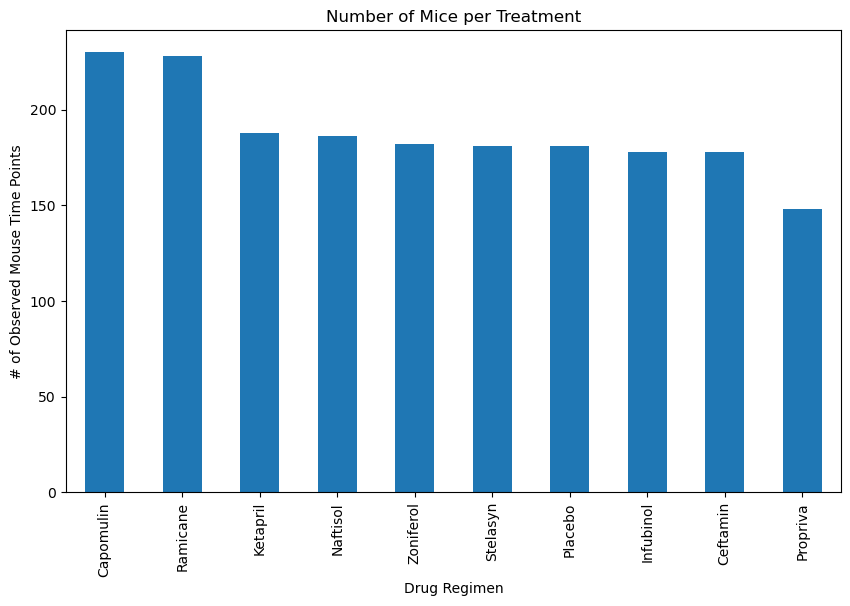

In [14]:
#generating a bar plot using pandas
regimen_counts.plot(kind="bar",figsize=(10,6))
# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.title("Number of Mice per Treatment")
plt.show()

In [15]:
regimen_counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [16]:
regimen_counts.values

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

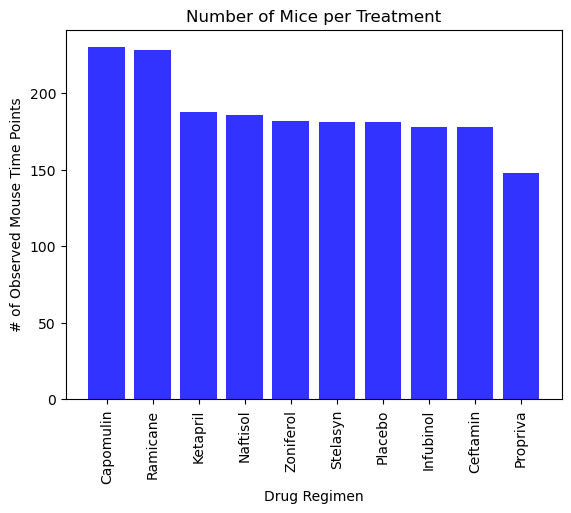

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#generating bar plot using pyplot
x_axis = regimen_counts.index.values
y_axis = regimen_counts
plt.bar(x_axis,y_axis,color = "b", alpha = 0.8, align = "center")
# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Time Points')
plt.title("Number of Mice per Treatment")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Grouping the data by "Sex" and number of mice in each category
male_vs_female = clean_mouse_data["Sex"].value_counts()
male_vs_female

Sex
Male      958
Female    922
Name: count, dtype: int64

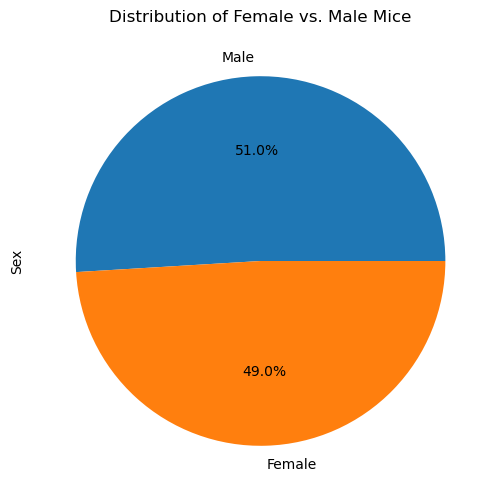

In [19]:
male_vs_female.plot(kind="pie",autopct='%1.1f%%', figsize=(6, 6))

# Add a title
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel("Sex")
plt.show()

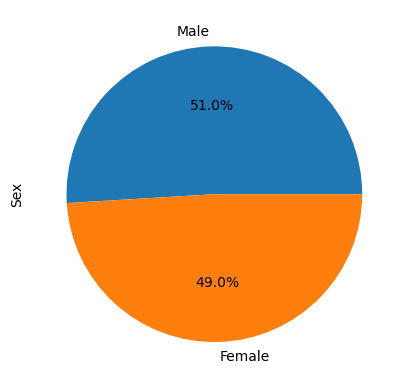

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = [ "Male","Female",]
sizes = [ 958,922,]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()



## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filter the DataFrame to include only the specific treatment regimens
Capomulin_regimen= clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Capomulin",:]
Ramicane_regimen= clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Ramicane",:]
Infubinol_regimen =  clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]=="Infubinol",:]
Ceftamin_regimen = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"]== "Ceftamin",:]



In [22]:
#Start by getting the last (greatest) timepoint for each mouse
Capomulin_last_timepoint = Capomulin_regimen.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge=pd.merge(Capomulin_last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')
Capomulin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [23]:
#Start by getting the last (greatest) timepoint for each mouse
Ramicane_last_timepoint = Ramicane_regimen.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_merge=pd.merge(Ramicane_last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')
Ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [24]:
#Start by getting the last (greatest) timepoint for each mouse
Infubinol_last_timepoint = Infubinol_regimen.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Infubinol_merge=pd.merge(Infubinol_last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')
Infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [25]:

#Start by getting the last (greatest) timepoint for each mouse
Ceftamin_last_timepoint = Ceftamin_regimen.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ceftamin_merge=pd.merge(Ceftamin_last_timepoint, clean_mouse_data, on=['Mouse ID', 'Timepoint'], how='inner')
Ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [26]:
Capomulin_last_timepoint.tail()

Mouse ID
v923    45
w150    10
w914    45
x401    45
y793    45
Name: Timepoint, dtype: int64

In [27]:
Capomulin_vol.head()

,Timepoint
Mouse ID,
b128,45
b742,45
f966,20
g288,45
g316,45


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = Capomulin_merge.loc[Capomulin_merge["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    
    # Add the tumor volumes to the list
    tumor_volume_data.append(tumor_volumes)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
     
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s Potential outliers: {outliers}")   

Capomulin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [29]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Creating a dictionary to store tumor volume data for each treatment group
tumor_volume_data = {
    'Capomulin': Capomulin_merge[Capomulin_merge['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'],
    'Ramicane': Ramicane_merge[Ramicane_merge['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'],
    'Infubinol': Infubinol_merge[Infubinol_merge['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)'],
    'Ceftamin': Ceftamin_merge[Ceftamin_merge['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)'],
}

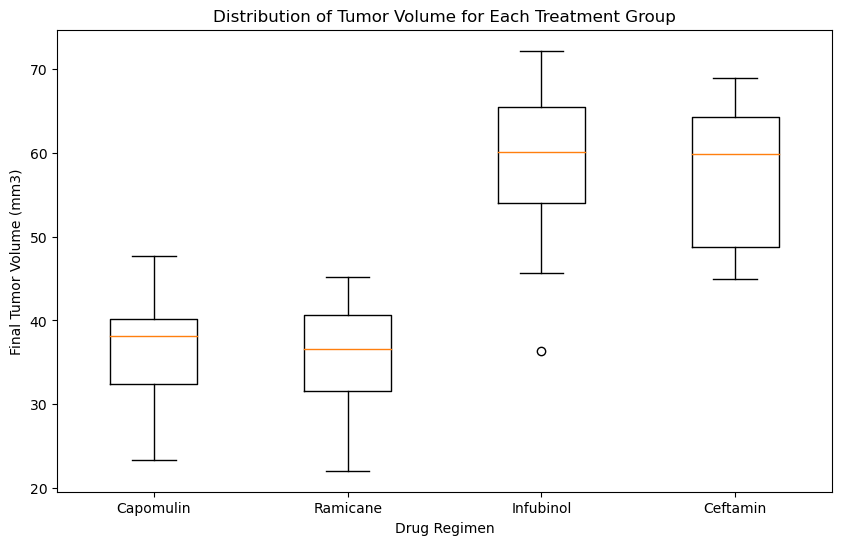

In [42]:
# Create a list of labels for the box plot
labels = list(tumor_volume_data.keys())

# Create a list of tumor volume data for the box plot
data = list(tumor_volume_data.values())

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels)

# Add labels and a title
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot

#plt.grid(axis='y')
plt.show()

## Line and Scatter Plots

In [54]:
Capomulin_line_df = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "l509", :]
Capomulin_line_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


Text(0, 0.5, 'Tumor Volume (mm3)')

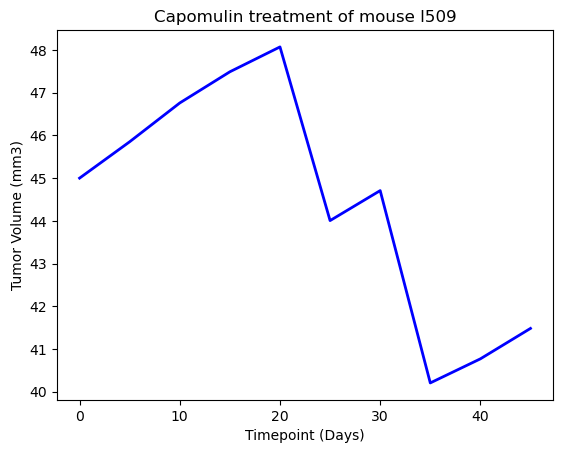

In [55]:
x_axis = Capomulin_line_df["Timepoint"]
tumsiz = Capomulin_line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, tumsiz, linewidth=2, markersize=15,  color="blue", label="Tumor Volume (mm3)")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
 


In [60]:
Capomulin_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            25 non-null     object 
 1   Timepoint           25 non-null     int64  
 2   Tumor Volume (mm3)  25 non-null     float64
 3   Metastatic Sites    25 non-null     int64  
 4   Drug Regimen        25 non-null     object 
 5   Sex                 25 non-null     object 
 6   Age_months          25 non-null     int64  
 7   Weight (g)          25 non-null     int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 1.7+ KB


TypeError: Could not convert Capomulin to numeric

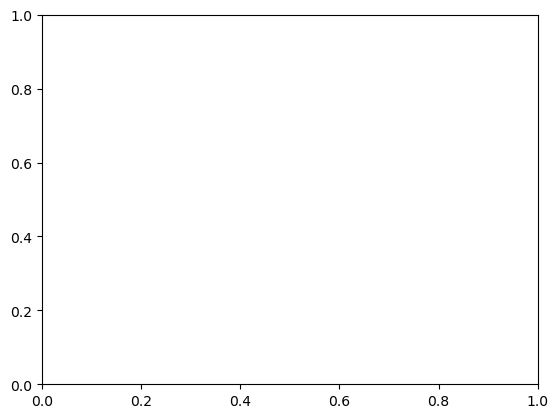

In [61]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol =Capomulin_merge.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
